# Exercise 5.1

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt


%matplotlib inline

/Users/Sam/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Sam/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
os.chdir('/Users/Sam/ds/metis/metisgh/sf16_ds4/local/Challenge_Five')

In [3]:
cols = ['Party']
for i in range(16):
    cols.append('X'+ str(i+1))
print cols

['Party', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16']


In [4]:
df = pd.read_csv('house-votes-84.data', names = cols)

In [5]:
df = df.replace('?', np.NaN).replace('y', 1).replace('n', 0)
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:
df.fillna(df.mean(), inplace = True)
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


# Exercise 5.2

In [7]:
X = df.drop(['Party'], axis = 1)
y = df['Party']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4444)

# Exercise 5.3

In [9]:
def knnscore(num):
    reg = KNeighborsClassifier(n_neighbors = num)
    model = reg.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [10]:
accur_score = []
for i in range(1,21):
    accur_score.append(knnscore(i))
print accur_score

[0.9007633587786259, 0.89312977099236646, 0.9007633587786259, 0.9007633587786259, 0.91603053435114501, 0.93129770992366412, 0.91603053435114501, 0.92366412213740456, 0.93129770992366412, 0.93129770992366412, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.91603053435114501, 0.91603053435114501, 0.91603053435114501]


In [11]:
print 'The k with the highest accuracy score is: ' + str(accur_score.index(max(accur_score)) + 1)

The k with the highest accuracy score is: 6


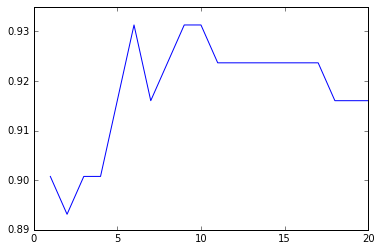

In [12]:
plt.plot(range(1,21), accur_score)

# Exercise 5.4

In [13]:
model = LogisticRegression()
modelfit = model.fit(X_train, y_train)
y_pred = modelfit.predict(X_test)
accuracy_score(y_test, y_pred)

0.93893129770992367

# Exercise 5.5

In [14]:
partylist = df['Party'].value_counts().tolist()

([<matplotlib.axis.XTick at 0x11c757950>,
 <a list of 2 Text xticklabel objects>)

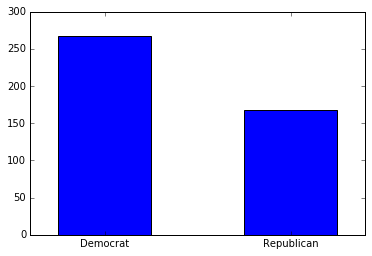

In [15]:
n_groups = 2
index = np.arange(n_groups)
plt.bar(index, partylist, color = 'blue', edgecolor = 'black', width = 0.5, align = 'center')
plt.xticks(index, ('Democrat', 'Republican'))

In [16]:
def makedemocrat(array):
    demarray = []
    for element in range(0,len(array)):
        demarray.append('democrat')
    return demarray

In [17]:
def makerepub(array):
    repubarray = []
    for element in range(0,len(array)):
        repubarray.append('republican')
    return repubarray

In [18]:
newarr = range(0,131)
y_pred = makedemocrat(newarr)
demsco = accuracy_score(y_test, y_pred)

In [19]:
y_pred = makerepub(newarr)
repsco = accuracy_score(y_test, y_pred)

# Exercise 5.6

In [20]:
accur_score
demaccur_score = []
repaccur_score = []
for i in range(0, len(accur_score)):
    demaccur_score.append(demsco)
    repaccur_score.append(repsco)

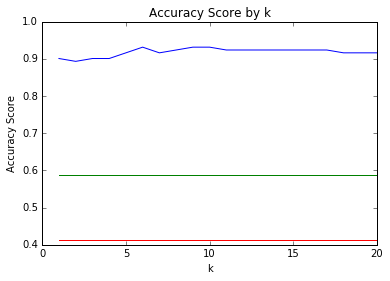

In [21]:
plt.plot(range(1,21), accur_score)
plt.plot(range(1,21), demaccur_score)
plt.plot(range(1,21), repaccur_score)
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score by k')

# Exercise 5.7

In [22]:
m, trainerror, testerror = learning_curve(model, X,y, cv = 10)

In [23]:
train_cv_err = np.mean(trainerror, axis=1)
test_cv_err = np.mean(testerror, axis=1)

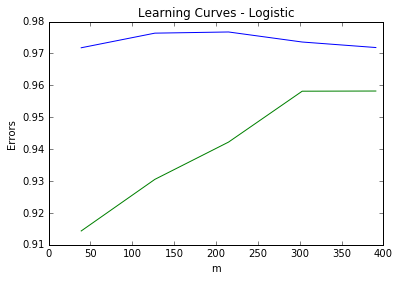

In [24]:
plt.plot(m, train_cv_err)
plt.plot(m, test_cv_err)
plt.xlabel('m')
plt.ylabel('Errors')
plt.title('Learning Curves - Logistic')

In [25]:
knnmodel = KNeighborsClassifier(n_neighbors = 6)
m, trainerror, testerror = learning_curve(knnmodel, X, y, cv = 10)

In [26]:
train_cv_err = np.mean(trainerror, axis=1)
test_cv_err = np.mean(testerror, axis=1)

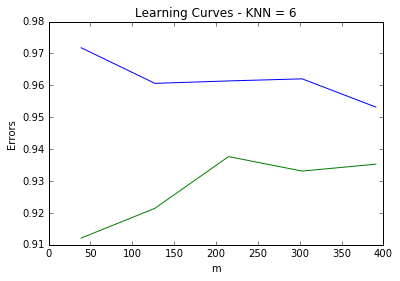

In [27]:
plt.plot(m, train_cv_err)
plt.plot(m, test_cv_err)
plt.xlabel('m')
plt.ylabel('Errors')
plt.title('Learning Curves - KNN = 6')

# Exercise 5.8

In [28]:
naivemodel = GaussianNB()
naivefit = naivemodel.fit(X_train, y_train)
naivepred = naivefit.predict(X_test)
naivescore = accuracy_score(y_test, naivepred)
print naivescore

0.93893129771


In [29]:
svcmodel = SVC()
svcfit = svcmodel.fit(X_train, y_train)
svcpred = svcfit.predict(X_test)
svcscore = accuracy_score(y_test, svcpred)
print svcscore

0.954198473282


In [30]:
dectreemodel = DecisionTreeClassifier()
dectreefit = dectreemodel.fit(X_train, y_train)
dectreepred = dectreefit.predict(X_test)
dectreescore = accuracy_score(y_test, dectreepred)
print dectreescore

0.946564885496


In [31]:
randformodel = RandomForestClassifier()
randforfit = randformodel.fit(X_train, y_train)
randforpred = randforfit.predict(X_test)
randforscore = accuracy_score(y_test, randforpred)
print randforscore

0.946564885496


# Exercise 5.9

In [32]:
naive_score = np.mean(cross_val_score(naivemodel, X, y, cv = 10))
svc_score = np.mean(cross_val_score(svcmodel, X, y, cv = 10))
dectree_score = np.mean(cross_val_score(dectreemodel, X, y, cv = 10))
randfor_score = np.mean(cross_val_score(randformodel, X, y, cv = 10))

In [33]:
print naive_score, svc_score, dectree_score, randfor_score

0.939773985704 0.958280479211 0.939887244538 0.956010268801


# Exercise 5.10

In [34]:
df = pd.read_csv('house-votes-84.data', names = cols)

In [35]:
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [36]:
df = df.replace('y', 1).replace('n', 0)

In [64]:
modes = df.mode()
modes

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,democrat,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1


In [65]:
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,0,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [68]:
def repmode(name):
    df[name] = df[name].replace('?', modes[name][0])

In [72]:
for i in range(1, 17):
    stri = 'X' + str(i)
    repmode(stri)

In [73]:
df.head()

,Party,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [163]:
value = stuff[[1]]

In [76]:
newX = df.drop(['Party', 'X1'], axis = 1)
newy = df['X1']
X_train, X_test, y_train, y_test = train_test_split(newX, newy, test_size = 0.3, random_state = 4444)

In [77]:
newmodel = LogisticRegression()
newmodelfit = newmodel.fit(X_train, y_train)
newypred = newmodelfit.predict(X_test)

In [78]:
accuracy_score(y_test, newypred)

0.6717557251908397

# Exercise 5.11

In [134]:
os.chdir('/Users/Sam/ds/metis/metisgh/sf16_ds4/challenges/03-linear_splitting')

In [135]:
dfmovie = pd.read_csv('2013_movies.csv')

In [136]:
dfmovie = dfmovie.dropna()

In [137]:
ratings = dfmovie['Rating'].value_counts().tolist()

([<matplotlib.axis.XTick at 0x11dd01e90>,
 <a list of 3 Text xticklabel objects>)

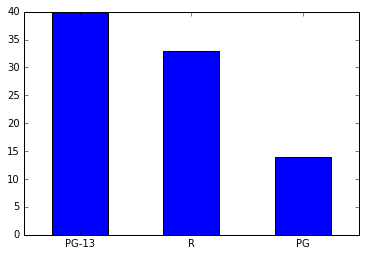

In [138]:
n_groups = 3
index = np.arange(n_groups)
plt.bar(index, ratings, width = 0.5, align = 'center')
plt.xticks(index, ('PG-13', 'R', 'PG'))

In [139]:
dfmovie.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [140]:
dfmovie['Budget'] = dfmovie['Budget']/1000000
dfmovie['DomesticTotalGross'] = dfmovie['DomesticTotalGross']/1000000

In [141]:
dfmovie.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130.0,424.668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200.0,409.013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150.0,400.738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76.0,368.061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225.0,291.045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [142]:
dfmovieX = dfmovie[['Budget', 'DomesticTotalGross','Runtime']]
dfmoviey = dfmovie['Rating']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(dfmovieX, dfmoviey, test_size = 0.3, random_state = 4444)

In [144]:
modelknn = KNeighborsClassifier()
modelknnfit = modelknn.fit(X_train, y_train)
modelknnypred = modelknnfit.predict(X_test)

In [145]:
accuracy_score(y_test, modelknnypred)

0.55555555555555558

In [146]:
modellog = LogisticRegression()
modellogfit = modellog.fit(X_train, y_train)
modellogypred = modellogfit.predict(X_test)

In [147]:
accuracy_score(y_test, modellogypred)

0.48148148148148145

In [150]:
def pred_rating(X):
   return ['PG-13' for x in range(len(X))]

In [151]:
stupidy = pred_rating(dfmovie)

In [156]:
stupidy = stupidy[:27]

In [157]:
accuracy_score(y_test, stupidy)

0.40740740740740738

The KNN and logistic regression have accuracy scores of 0.56 and 0.48 vs. the stupid baseline accuarcy score of 0.41

In [158]:
modellog.coef_

array([[ 0.00237726,  0.00430142, -0.02981765],
       [ 0.02580388, -0.00382008, -0.00711972],
       [-0.0422226 ,  0.0010219 ,  0.01912282]])

# Exercise 5.12

In [163]:
os.chdir('/Users/Sam/ds/metis/metisgh/sf16_ds4/local/Challenge_Five')

In [164]:
cols = ['Age', 'Year', 'Nodes', 'Survival']

In [166]:
dfmed = pd.read_csv('haberman.data', names = cols)

In [168]:
dfmed.head()

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [178]:
print np.mean(dfmed['Age'])
print np.std(dfmed['Age'])

52.4575163399
10.7857852036


In [185]:
df5ormore = dfmed[dfmed['Survival'] == 1]
dfless5 = dfmed[dfmed['Survival'] == 2]

In [187]:
print np.mean(df5ormore['Age'])
print np.std(df5ormore['Age'])

52.0177777778
10.9876554751


In [188]:
print np.mean(dfless5['Age'])
print np.std(dfless5['Age'])

53.6790123457
10.104182193


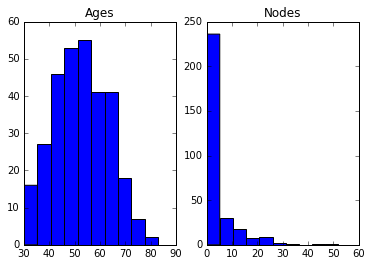

In [192]:
plt.subplot(1,2,1)
plt.hist(dfmed['Age'])
plt.title('Ages')

plt.subplot(1,2,2)
plt.hist(dfmed['Nodes'])
plt.title('Nodes')

In [195]:
dfmed['Year'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68])

In [193]:
min(dfmed['Year'])

58

In [196]:
max(dfmed['Year'])

69

In [198]:
X = dfmed.drop(['Survival'], axis = 1)
y = dfmed['Survival']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

In [200]:
logmodel = LogisticRegression()
logmodelfit = logmodel.fit(X_train, y_train)
logmodelypred = logmodelfit.predict(X_test)

In [201]:
accuracy_score(y_test,logmodelypred)

0.81521739130434778

In [202]:
logmodelfit.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

In [205]:
m, trainerror, testerror = learning_curve(logmodel, X, y, cv = 5)

In [206]:
train_cv_err = np.mean(trainerror, axis=1)
test_cv_err = np.mean(testerror, axis=1)

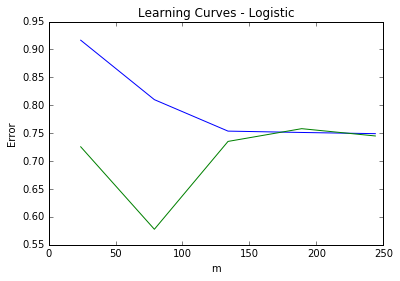

In [211]:
plt.plot(m, train_cv_err)
plt.plot(m, test_cv_err)
plt.xlabel('m')
plt.ylabel('Error')
plt.title('Learning Curves - Logistic')